### 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve,confusion_matrix
import matplotlib.pyplot as plt
import statistics 
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import random



In [4]:
df=pd.read_csv('wdbc.data', header=None)

In [5]:
df_norm=pd.DataFrame(preprocessing.normalize(df.iloc[:,2:]))
df_norm[1] = df[1].map( {'M':0, 'B':1} )
df_new=df_norm.drop(0,axis=1)
#df_new

### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised,and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall, F-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning: Train an L1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalized data. 

In [6]:
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30):
    train_df=pd.DataFrame
    test_df=pd.DataFrame
    mal_df=df_new[df_new[1]==0]
    ben_df=df_new[df_new[1]==1]
    test_df=mal_df.sample(frac=0.2).append(ben_df.sample(frac=0.2))
    index_todrop = test_df.index
    train_df=df_new.drop(index = index_todrop)
    train_y=train_df.loc[:,1]
    train_x=train_df.iloc[:,2:]
    test_y=test_df.loc[:,1]
    test_x=test_df.iloc[:,2:]
    parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
    model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=5 )
    model.fit(train_x, train_y)
    
    #calculating train parameters
    pred_y_tr = model.predict(train_x)
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))

    #calculating tst params
    pred_y = model.predict(test_x)
    print(model.best_params_)
    ps.append(precision_score(test_y, pred_y))
    rs.append(recall_score(test_y, pred_y))
    acs.append(accuracy_score(test_y, pred_y)) 
    fs.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))

{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 100, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 100, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 100, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}
{'C': 100, 'max_iter': 2000}
{'C': 1000, 'max_iter': 2000}


### Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs.

In [7]:
print("avg train precision score: ",statistics.mean(ps_tr))
print("avg train f1 score: ",statistics.mean(fs_tr))
print("avg train recall score: ",statistics.mean(rs_tr))
print("avg train AUC score: ",statistics.mean(AUC_tr))
print("avg train acuracy score: ",statistics.mean(acs_tr))
print("avg test precision score: ",statistics.mean(ps))
print("avg test f1 score: ",statistics.mean(fs))
print("avg test recall score: ",statistics.mean(rs))
print("avg test AUC score: ",statistics.mean(AUC))
print("avg test acuracy score: ",statistics.mean(acs))



('avg train precision score: ', 0.9694654364507518)
('avg train f1 score: ', 0.97294232782847)
('avg train recall score: ', 0.9764568764568764)
('avg train AUC score: ', 0.9623460852872617)
('avg train acuracy score: ', 0.9659356725146199)
('avg test precision score: ', 0.9600258072251734)
('avg test f1 score: ', 0.9623638859069996)
('avg test recall score: ', 0.9652582159624413)
('avg test AUC score: ', 0.9481052984574112)
('avg test acuracy score: ', 0.9525073746312684)


### Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [8]:
conf = confusion_matrix(test_y,pred_y)
print("Confusion Matrix for the test set: ")
print(conf)

conf_tr = confusion_matrix(train_y,pred_y_tr)
print("Confusion Matrix for the train set: ")
print(conf_tr)

Confusion Matrix for the test set: 
[[42  0]
 [ 2 69]]
Confusion Matrix for the train set: 
[[161   9]
 [  7 279]]


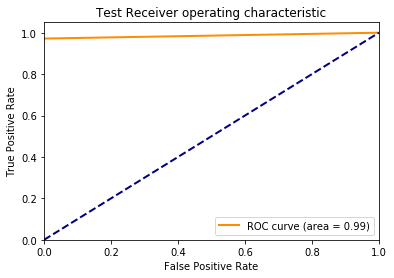

In [9]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


 

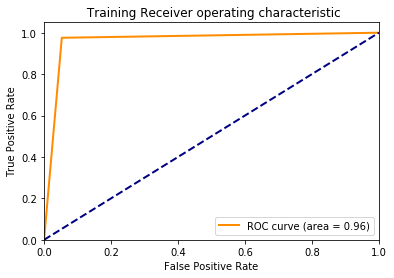

In [10]:
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Training Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.


#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [11]:
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30): 
    mal_df=df_new[df_new[1]==0]
    ben_df=df_new[df_new[1]==1]
    df_lab=mal_df.sample(frac=0.5).append(ben_df.sample(frac=0.5))
    index_todrop = df_lab.index
    df_unlab=df_new.drop(index = index_todrop)
    df_lab=df_lab.reset_index(drop=True)
    df_unlab=df_unlab.reset_index(drop=True)
    x_lab=df_lab.iloc[:,2:] #train
    y_lab=df_lab.loc[:,1]
    x_unlab=df_unlab.iloc[:,2:] #test
    y_unlab=df_unlab.loc[:,1]
    for l in range(len(x_unlab)):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=5 )
        model.fit(x_lab, y_lab)
        dist_index=np.argmax(model.decision_function(x_unlab))
        q=pd.DataFrame(x_unlab.iloc[dist_index,:]).T
        y_lab=pd.concat([y_lab,pd.DataFrame(model.predict(q))],axis=0)
        #y_lab.reset_index(drop=True)
        x_lab=pd.concat([x_lab,q],axis=0)
        x_unlab=x_unlab.drop(index=dist_index,axis=0)
        x_unlab=x_unlab.reset_index(drop=True)
        #print(len(x_lab),len(x_unlab),len(y_lab),dist_index)
        
    x_unlab=df_unlab.iloc[:,2:]
 
    pred_y_f=model.predict(x_unlab) #test
    ps.append(precision_score(y_unlab, pred_y_f))
    rs.append(recall_score(y_unlab,pred_y_f))
    acs.append(accuracy_score(y_unlab, pred_y_f)) 
    fs.append(f1_score(y_unlab, pred_y_f))
    fpr, tpr, _ = roc_curve(y_unlab,pred_y_f)
    AUC.append(auc(fpr, tpr))
        
    x_lab=df_lab.iloc[:,2:]
    y_lab=df_lab.loc[:,1]
    pred_y_f_tr=model.predict(x_lab) #train
    ps_tr.append(precision_score(y_lab, pred_y_f_tr))
    rs_tr.append(recall_score(y_lab,pred_y_f_tr))
    acs_tr.append(accuracy_score(y_lab, pred_y_f_tr)) 
    fs_tr.append(f1_score(y_lab, pred_y_f_tr))
    fpr_tr, tpr_tr, _ = roc_curve(y_lab,pred_y_f_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    

In [12]:
print("avg train precision score: ",statistics.mean(ps_tr))
print("avg train f1 score: ",statistics.mean(fs_tr))
print("avg train recall score: ",statistics.mean(rs_tr))
print("avg train AUC score: ",statistics.mean(AUC_tr))
print("avg train acuracy score: ",statistics.mean(acs_tr))
print("avg test precision score: ",statistics.mean(ps))
print("avg test f1 score: ",statistics.mean(fs))
print("avg test recall score: ",statistics.mean(rs))
print("avg test AUC score: ",statistics.mean(AUC))
print("avg test acuracy score: ",statistics.mean(acs))


('avg train precision score: ', 0.9504648268646253)
('avg train f1 score: ', 0.9671876930020381)
('avg train recall score: ', 0.984729981378026)
('avg train AUC score: ', 0.9486542988651137)
('avg train acuracy score: ', 0.9578947368421052)
('avg test precision score: ', 0.9356117662286525)
('avg test f1 score: ', 0.9577692304648306)
('avg test recall score: ', 0.9816479400749063)
('avg test AUC score: ', 0.93311956752173)
('avg test acuracy score: ', 0.9454225352112676)


In [13]:
conf = confusion_matrix(y_unlab,pred_y_f)
print("Confusion Matrix for the test set: ")
print(conf)

conf_tr = confusion_matrix(y_lab,pred_y_f_tr)
print("Confusion Matrix for the train set: ")
print(conf_tr)

Confusion Matrix for the test set: 
[[ 71  35]
 [  2 176]]
Confusion Matrix for the train set: 
[[ 90  16]
 [  0 179]]


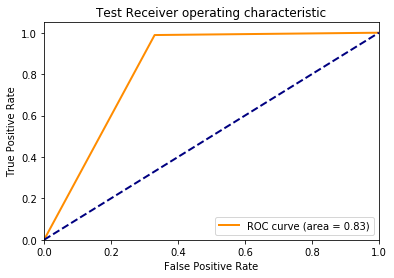

In [14]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



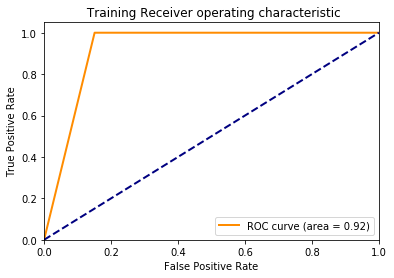

In [15]:
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Training Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

To ensure that the algorithm dosent get trapped in local minimum 

-> used n_init=5 and used kmean++ to choose the best among the initial centroid points

-> ran the  k-means algorithm multiple times with different seeds to make sure the algorithm will choose the clusters that are compact and far away from each other.

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.


In [29]:
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30):
    train_df=pd.DataFrame
    test_df=pd.DataFrame
    train_x=pd.DataFrame
    train_y=pd.DataFrame
    pred_y_tr=pd.DataFrame
    mal_df=df_new[df_new[1]==0]
    ben_df=df_new[df_new[1]==1]
    test_df=mal_df.sample(frac=0.2).append(ben_df.sample(frac=0.2))
    index_todrop = test_df.index
    train_df=df_new.drop(index = index_todrop)

    train_y=train_df.loc[:,1]
    train_x=train_df.iloc[:,2:]
    test_y=test_df.loc[:,1]
    test_x=test_df.iloc[:,2:]
    
    train_x=train_x.reset_index(drop=True)
    train_y=train_y.reset_index(drop=True)
    test_x=test_x.reset_index(drop=True)
    test_y=test_y.reset_index(drop=True)
    kmeans=KMeans(n_clusters=2,init='k-means++',n_init=5,random_state=random.randint(0,100)).fit(train_x)
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    distances, indices = neigh.kneighbors(kmeans.cluster_centers_)
    cluster0=train_y.loc[indices[0]] #true values for 30 points in cluster 0      
    #cluster1=pred_y_tr.loc[indices[1]]
    poll0=cluster0.value_counts()
    #cluster0=train_y.loc[indices[0]]



    cluster1=train_y.loc[indices[1]] #true values for 30 points cluster 1
    poll1=cluster1.value_counts()
    #cluster1.value_counts()

    pred_y_ = kmeans.labels_
    pred_y_=pd.DataFrame(pred_y_)
    pred_y_0=pred_y_[pred_y_[0]==0]
    pred_y_1=pred_y_[pred_y_[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    pred_y_0['class']=max_index_0
    pred_y_1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y_0['class'],pred_y_1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()
    
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    
    pred_y = kmeans.predict(test_x)
    ps.append(precision_score(test_y, pred_y))
    rs.append(recall_score(test_y, pred_y))
    acs.append(accuracy_score(test_y, pred_y)) 
    fs.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))


#### C. Classify test data based on their proximity to the centers of the clusters.Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [30]:
print("avg train precision score: ",statistics.mean(ps_tr))
print("avg train f1 score: ",statistics.mean(fs_tr))
print("avg train recall score: ",statistics.mean(rs_tr))
print("avg train AUC score: ",statistics.mean(AUC_tr))
print("avg train acuracy score: ",statistics.mean(acs_tr))
print("avg test precision score: ",statistics.mean(ps))
print("avg test f1 score: ",statistics.mean(fs))
print("avg test recall score: ",statistics.mean(rs))
print("avg test AUC score: ",statistics.mean(AUC))
print("avg test acuracy score: ",statistics.mean(acs))

('avg train precision score: ', 0.8447906979789594)
('avg train f1 score: ', 0.9053995135881362)
('avg train recall score: ', 0.9754079254079254)
('avg train AUC score: ', 0.8369196489784725)
('avg train acuracy score: ', 0.8721491228070176)
('avg test precision score: ', 0.4110815276955982)
('avg test f1 score: ', 0.4192462775553748)
('avg test recall score: ', 0.4384976525821596)
('avg test AUC score: ', 0.4625027945450481)
('avg test acuracy score: ', 0.4563421828908555)


In [31]:
conf_tr = confusion_matrix(train_y,pred_y_tr)
print("Confusion Matrix for the train set: ")
print(conf_tr)

conf = confusion_matrix(test_y,pred_y)
print("Confusion Matrix for the test set: ")
print(conf)

Confusion Matrix for the train set: 
[[122  48]
 [  7 279]]
Confusion Matrix for the test set: 
[[27 15]
 [ 2 69]]


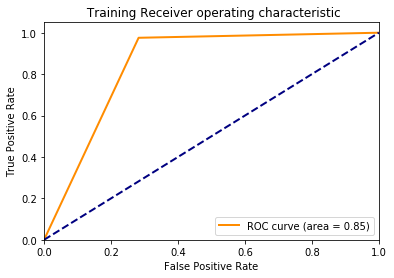

In [32]:
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Training Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

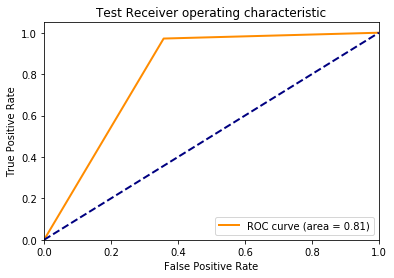

In [33]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel.

spectral clustering performs dimensionality reduction before clustering and is used when the structure of the individual clusters is highly non-convex or when a measure of the center and spread of the cluster is not a suitable description of the complete cluster 

In [54]:
from sklearn.cluster import SpectralClustering
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]
for M in range(0,30):
    train_df=pd.DataFrame
    test_df=pd.DataFrame
    train_x=pd.DataFrame
    train_y=pd.DataFrame
    pred_y_tr=pd.DataFrame
    mal_df=df_new[df_new[1]==0]
    ben_df=df_new[df_new[1]==1]
    test_df=mal_df.sample(frac=0.2).append(ben_df.sample(frac=0.2))
    index_todrop = test_df.index
    train_df=df_new.drop(index = index_todrop)
    train_y=train_df.loc[:,1]
    train_x=train_df.iloc[:,2:]
    test_y=test_df.loc[:,1]
    test_x=test_df.iloc[:,2:]
    
    train_x=train_x.reset_index(drop=True)
    train_y=train_y.reset_index(drop=True)
    test_x=test_x.reset_index(drop=True)
    test_y=test_y.reset_index(drop=True)
    sc=SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=random.randint(0,100)).fit(train_x)
    label=pd.DataFrame(sc.labels_)
    label_0=label[label[0]==0].index
    label_1=label[label[0]==1].index
    cluster0=train_x.iloc[label_0,:]
    cluster1=train_x.iloc[label_1,:]
    
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)

    center=pd.DataFrame()
    center[0]=center0
    center[1]=center1
    print(center.T)
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    #print(neigh.kneighbors())
    distances, indices = neigh.kneighbors(center.T)
    cluster0=train_y.loc[indices[0]] #true values for 30 points in cluster 0      
    poll0=cluster0.value_counts()
    cluster1=train_y.loc[indices[1]] #true values for 30 points cluster 1
    poll1=cluster1.value_counts()
    #cluster1.value_counts()

    pred_y_ = sc.labels_
    pred_y_=pd.DataFrame(pred_y_)
    pred_y_0=pred_y_[pred_y_[0]==0]
    pred_y_1=pred_y_[pred_y_[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    pred_y_0['class']=max_index_0
    pred_y_1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y_0['class'],pred_y_1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()                                                                                           
 
    #pred_y_tr = sc.labels_
    #print(pred_y_tr)
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    
    pred_y = sc.fit_predict(test_x)
    ps.append(precision_score(test_y, pred_y))
    rs.append(recall_score(test_y, pred_y))
    acs.append(accuracy_score(test_y, pred_y)) 
    fs.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))

         3         4         5         6         7         8         9   \
0  0.628045  0.000130  0.000118  0.000076  0.000039  0.000246  0.000089   
1  0.546619  0.000071  0.000092  0.000090  0.000050  0.000133  0.000045   

         10        11        12    ...           20        21        22  \
0  0.000405  0.001729  0.002877    ...     0.018148  0.032597  0.118489   
1  0.000374  0.000806  0.002580    ...     0.013332  0.020421  0.088324   

         23        24        25        26        27        28        29  
0  0.758175  0.000177  0.000271  0.000259  0.000107  0.000381  0.000113  
1  0.826283  0.000102  0.000249  0.000280  0.000113  0.000232  0.000066  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.627808  0.000131  0.000120  0.000078  0.000040  0.000247  0.000089   
1  0.544212  0.000066  0.000086  0.000086  0.000049  0.000123  0.000041   

         10        11        12    ...           20        21        22  \
0 

         3         4         5         6         7         8         9   \
0  0.627998  0.000129  0.000115  0.000071  0.000038  0.000244  0.000088   
1  0.545516  0.000070  0.000094  0.000095  0.000052  0.000132  0.000043   

         10        11        12    ...           20        21        22  \
0  0.000406  0.001785  0.002893    ...     0.018159  0.032937  0.118470   
1  0.000363  0.000773  0.002538    ...     0.013164  0.019870  0.087694   

         23        24        25        26        27        28        29  
0  0.758099  0.000176  0.000261  0.000243  0.000105  0.000378  0.000112  
1  0.826900  0.000101  0.000262  0.000295  0.000118  0.000230  0.000065  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.628554  0.000129  0.000117  0.000074  0.000038  0.000245  0.000088   
1  0.546333  0.000071  0.000092  0.000091  0.000050  0.000134  0.000044   

         10        11        12    ...           20        21        22  \
0 

         3         4         5         6         7         8         9   \
0  0.545280  0.000070  0.000092  0.000092  0.000051  0.000130  0.000043   
1  0.628067  0.000131  0.000117  0.000074  0.000039  0.000246  0.000089   

         10        11        12    ...           20        21        22  \
0  0.000362  0.000762  0.002489    ...     0.013156  0.019845  0.087154   
1  0.000410  0.001775  0.002910    ...     0.018204  0.033176  0.118761   

         23        24        25        26        27        28        29  
0  0.827200  0.000100  0.000253  0.000288  0.000115  0.000228  0.000065  
1  0.757973  0.000177  0.000268  0.000253  0.000107  0.000380  0.000113  

[2 rows x 27 columns]
         3         4         5         6         7         8         9   \
0  0.628862  0.000128  0.000117  0.000076  0.000039  0.000242  0.000087   
1  0.546057  0.000070  0.000094  0.000094  0.000052  0.000131  0.000044   

         10        11        12    ...           20        21        22  \
0 

In [55]:
print("avg train precision score: ",statistics.mean(ps_tr))
print("avg train f1 score: ",statistics.mean(fs_tr))
print("avg train recall score: ",statistics.mean(rs_tr))
print("avg train AUC score: ",statistics.mean(AUC_tr))
print("avg train acuracy score: ",statistics.mean(acs_tr))
print("avg test precision score: ",statistics.mean(ps))
print("avg test f1 score: ",statistics.mean(fs))
print("avg test recall score: ",statistics.mean(rs))
print("avg test AUC score: ",statistics.mean(AUC))
print("avg test acuracy score: ",statistics.mean(acs))

('avg train precision score: ', 0.8505727885245266)
('avg train f1 score: ', 0.9066696891239245)
('avg train recall score: ', 0.9707459207459208)
('avg train AUC score: ', 0.8418435486082545)
('avg train acuracy score: ', 0.8746345029239766)
('avg test precision score: ', 0.26184475686205305)
('avg test f1 score: ', 0.26122830679679804)
('avg test recall score: ', 0.26995305164319244)
('avg test AUC score: ', 0.35084954169461213)
('avg test acuracy score: ', 0.3300884955752213)


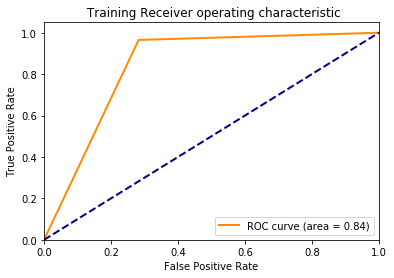

In [56]:
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Training Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

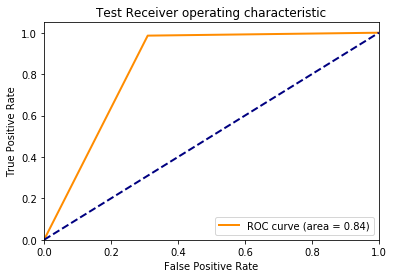

In [57]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### V. One can expect that supervised learning on the full data set works better than  semi-supervised learning with half of the data set labeled.One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


In [60]:
pd.DataFrame({"Method":['Supervised Learning','Semi-supervised Learning','Unsupervised Learning','Spectral Clustering'],"Test Accuracy":[0.99,0.83,0.85,0.84],"Train Accuracy":[0.96,0.92,0.81,0.84]})

,Method,Test Accuracy,Train Accuracy
0,Supervised Learning,0.99,0.96
1,Semi-supervised Learning,0.83,0.92
2,Unsupervised Learning,0.85,0.81
3,Spectral Clustering,0.84,0.84
